In [63]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spin_models as spin

from astropy import constants as const
from astropy import units as u


In [64]:
#convertions and constants
G_value = const.G.value
Msun_to_kg = (1*u.M_sun).to(u.kg).value #Msun to kg
pc_to_m = (1*u.pc).to(u.m).value #parsecs to m

In [65]:
def find_exchange_DE(m1,m_ex,m_int,a_t):

    a_t = a_t * u.pc
    m1 = m1 * u.M_sun
    m_ex = m_ex * u.M_sun
    m_int = m_int*u.M_sun

    BE_i = const.G*(m1.to(u.kg)*m_ex.to(u.kg))/(2*a_t.to(u.m))
    BE_f = const.G*(m1.to(u.kg)*m_int.to(u.kg))/(2*a_t.to(u.m))

    DE = BE_f - BE_i
    
    return DE.value,BE_i.value

In [66]:
def a_hard(M1,qin):
    M1 = M1*u.Msun
    ahard = 0.80 * (4*qin)/(1+qin)**2 * ((M1.value*(1+qin))/10**8)**(1/2)
    return ahard

In [67]:
triple_filename = "/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/Triple_outcomes_N_100.csv"
df_trip = pd.read_csv(triple_filename,index_col=False)

In [68]:
df_trip = df_trip[:520]

In [69]:
N = len(df_trip)/100

In [74]:
dE_vals = []
BE_vals = []
qout_vals = []
for i in range(len(df_trip)):
    
    m1 = df_trip["M1"].iloc[i]
    m2 = df_trip["M2"].iloc[i]
    m3 = df_trip["M3"].iloc[i]
    qin = df_trip["qin"].iloc[i]
    qout = df_trip["qout"].iloc[i]
    atrip = df_trip["a_triple"].iloc[i]

    ahard = a_hard(m1,qin)

    if(ahard<atrip):
        a_t = atrip
    else:
        a_t = atrip
    
    if((df_trip["merger_flag"].iloc[i] == "Tr-ej") | (df_trip["merger_flag"].iloc[i] == "No")):

        m_array = [m1,m2,m3]

        if((m3>m2) | (m3>m1)):
            ix = m_array.index(min(m_array))
            
            dEi,BEi = find_exchange_DE(m1,m2,m3,a_t)
            dE_vals.append(dEi)
            BE_vals.append(BEi)
            qout_vals.append(m3/m1)
            #qout_vals.append(qout)
            #qout_vals.append(m2/(m1+m3))


In [75]:
dE_vals= np.array(dE_vals)
BE_vals = np.array(BE_vals)

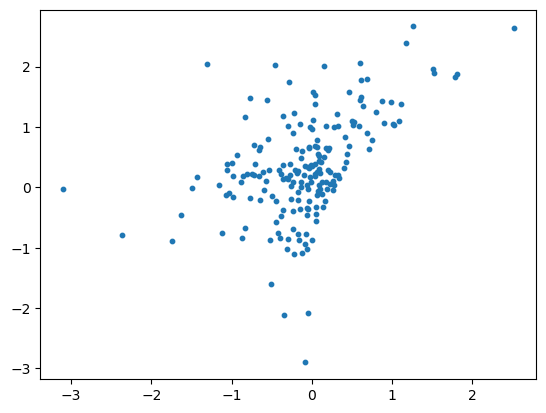

In [76]:
plt.scatter(np.log10(qout_vals),np.log10(dE_vals/BE_vals),s=10)

In [54]:
u,c = np.unique(np.log10(dE_vals/BE_vals),return_counts=True)
dup = u[c>1]

In [55]:
len(np.log10(dE_vals/BE_vals))

192

In [56]:
len(dup)

0

Text(0, 0.5, '$\\log(\\Delta E/E_B)$')

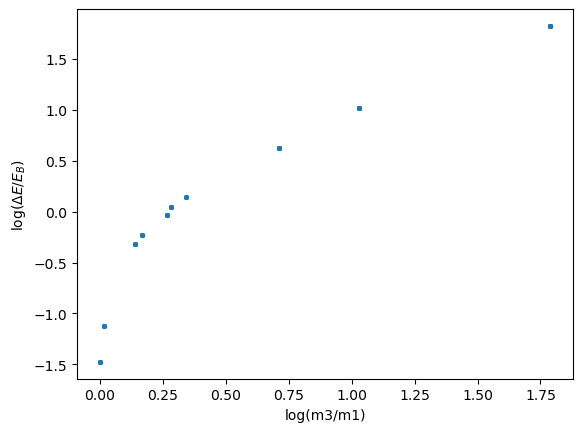

In [28]:
plt.scatter(np.log10(qout_vals),np.log10(dE_vals/BE_vals),s=4.7)
plt.xlabel("log(m3/m1)")
plt.ylabel("$\log(\Delta E/E_B)$")

Text(0, 0.5, '$\\log(\\Delta E/E_B)$')

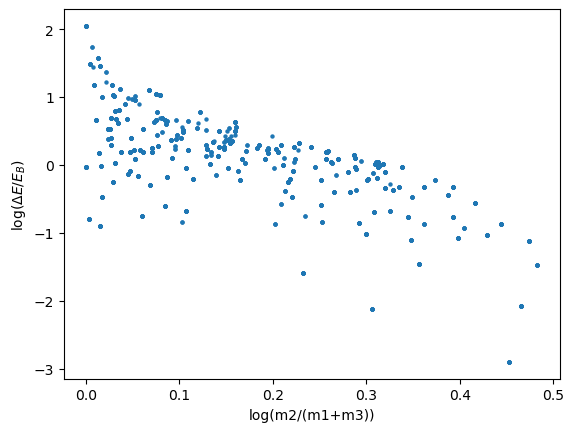

In [140]:
plt.scatter(qout_vals,np.log10(dE_vals/BE_vals),s=4.7)
plt.xlabel("log(m2/(m1+m3))")
plt.ylabel("$\log(\Delta E/E_B)$")

Text(0, 0.5, '$\\log(\\Delta E/E_B)$')

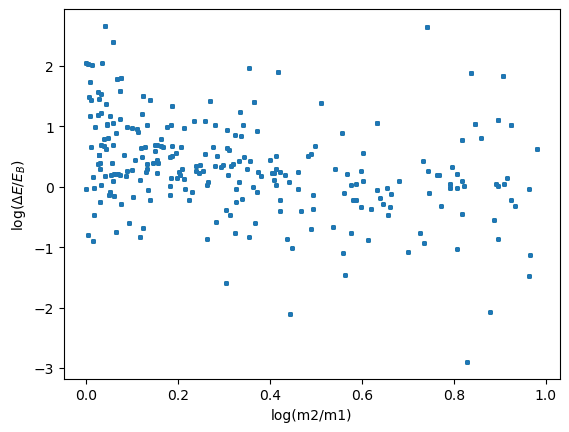

In [65]:
plt.scatter(qout_vals,np.log10(dE_vals/BE_vals),s=4.7)
plt.xlabel("log(m2/m1)")
#plt.axhline(y=np.mean(np.log10(dE_vals/BE_vals)))
plt.ylabel("$\log(\Delta E/E_B)$")